# Exploratory Callink Data Analysis for Cleanup
Explore the data and write the cleanup code for a pipeline. 
For every column, if cleanup is needed, write a function called cleanup_colname(df) that accepts a df and returns a df. Collect these into the SET cleanup_fn.

Always assume that the column values can be NaN!

## Imports and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style = "whitegrid", 
        color_codes = True)

In [2]:
og_data = pd.read_csv('all-rso.csv')
copy1 = og_data.copy()


In [3]:
# List of cleanup functions! Use this at the end.
cleanup_fn = set()

In [4]:
og_data.head()

,id,fullname,keyname,rso_email,description,summary,active_status,start_date,end_date,status_change_date,...,social_linkedin,social_flickr,social_gcal,social_youtube,social_callink,callink_profile_pic,priv_firstname,priv_lastname,priv_email,priv_phone
0,91590,#Downcrew,downcrew,kimambrocio@berkeley.edu,<p>We are a group of friends who are dedicated...,We are a group of friends who are dedicated to...,Active,2013-07-29T00:00:00+00:00,NaN,2017-10-04T17:49:18+00:00,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/down...,599b19a9-8f62-4f4f-969d-a158e7e1f82b3424e143-b...,Jiawei,Su,sujiawei123@berkeley.edu,949-467-4006
1,91366,*Native American Student Development*,nasd,nasd@berkeley.edu,NaN,The Native American Student Development office...,Active,2013-07-29T00:00:00+00:00,NaN,2017-11-30T17:31:23+00:00,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/NASD,d50fd452-50c4-4ec2-a4c8-86b0bdee2561ecaf85d1-e...,Phenocia,Bauerle,phenocia.bauerle@berkeley.edu,NaN
2,46114,*Asian Pacific American Student Development*,apasd,apasdoffice@gmail.com,NaN,Asian Pacific American Student Development (AP...,Active,1969-12-31T00:00:00+00:00,NaN,2017-11-30T17:14:20+00:00,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/apasd,019465ba-879b-40c1-b91f-f2ae4e9d08ece66a15fe-3...,Rajelin,Escondo,rescondo@berkeley.edu,NaN
3,69703,*LEAD Center*,leadcenter,lead@berkeley.edu,NaN,The LEAD Center supports student-centered lear...,Active,2012-08-30T00:00:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/LEAD...,c250a1c4-1350-424b-a2ab-5340b5843da55faecbfe-8...,LEAD,Center,lead@berkeley.edu,(510) 642-5171
4,132263,*Berkeley Art Studio*,artstudio,artstudio@berkeley.edu,<p>The Berkeley Art Studio offers classes in c...,The Berkeley Art Studio offers classes in cera...,Active,2015-07-31T00:00:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/arts...,5f465b71-1993-4751-bd95-cff8618d810f26b687d7-c...,Katelyn,Nomura-Weingrow,katelynnw@berkeley.edu,510-642-6161


## High Level Inspection

In [5]:
cols = copy1.columns.values
cols

array(['id', 'fullname', 'keyname', 'rso_email', 'description', 'summary',
       'active_status', 'start_date', 'end_date', 'status_change_date',
       'callink_type_id', 'callink_type_name', 'social_web',
       'social_insta', 'social_fb', 'social_twitter', 'social_linkedin',
       'social_flickr', 'social_gcal', 'social_youtube', 'social_callink',
       'callink_profile_pic', 'priv_firstname', 'priv_lastname',
       'priv_email', 'priv_phone'], dtype=object)

How many missing values are there per column?

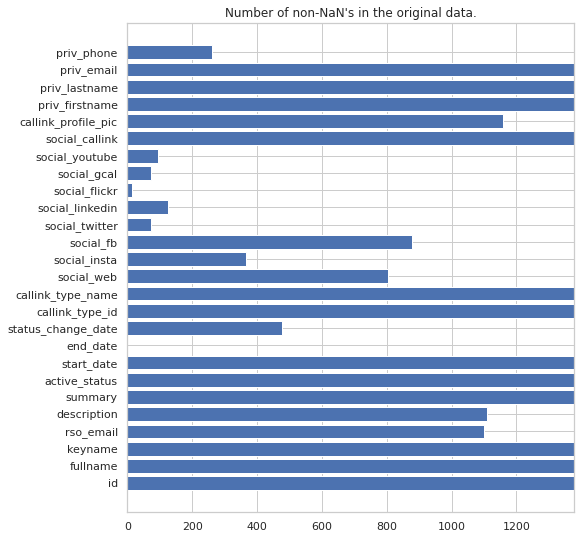

In [6]:
counts_blank = [copy1[col].notnull().sum() for col in cols]

plt.figure(figsize=(8,9));
plt.barh(width=counts_blank, y=cols);
plt.xlim(0, len(copy1));
plt.yticks(cols)
plt.title("Number of non-NaN's in the original data.");


## Per Column Cleaning

## 1. ID

Is ID unique for each RSO?

In [7]:
np.all(pd.unique(copy1["id"]) == copy1["id"])

True

In [8]:
sorted_id = copy1.sort_values(by="id", ascending=True)
sorted_id.head()

,id,fullname,keyname,rso_email,description,summary,active_status,start_date,end_date,status_change_date,...,social_linkedin,social_flickr,social_gcal,social_youtube,social_callink,callink_profile_pic,priv_firstname,priv_lastname,priv_email,priv_phone
26,45854,acts2fellowship,acts2fellowship,info@acts2fellowship.org,"<p>What is acts2fellowship?&nbsp;<a href=""http...",Acts2fellowship (a2f) is a Christian fellowshi...,Active,1969-12-31T00:00:00+00:00,NaN,NaN,...,NaN,https://www.flickr.com/photos/a2fberkeley,NaN,https://www.youtube.com/channel/UCOvfFWVBV3a7R...,https://callink.berkeley.edu/organization/acts...,da56ff75-de64-49f9-9510-ea9aa6bfa0f876e2181e-2...,Ethan,Teo,ethanteo99@berkeley.edu,510-910-3508
1036,45855,Prosthetics for Change at Berkeley,prostheticsforchange,NaN,NaN,Our mission is to globally sponsor artificial ...,Active,1969-12-31T00:00:00+00:00,NaN,2019-08-21T16:55:02+00:00,...,NaN,NaN,NaN,https://www.youtube.com/channel/UChuXY4J_Djejf...,https://callink.berkeley.edu/organization/pros...,6f820ca2-3d70-491c-a95e-386acd65570c4ee357ac-6...,Ashita,Dhadda,dhaddaashita@berkeley.edu,NaN
40,45856,"Alpha Epsilon Zeta Fraternity, Inc.",aez,aezberkeley@gmail.com,"<p><span style=""font-family: Cambria; font-siz...","Alpha Epsilon Zeta (AEZ) is an undergraduate, ...",Active,1969-12-31T00:00:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/aez,9c127afd-e176-435e-9965-05ab7fabe3e7214b4c72-f...,Yash,Agarwal,yagarwal@berkeley.edu,479-936-1141
46,45857,Alpha Phi Omega,calaphio,president@calaphio.com,<p>&nbsp;</p>\r\n<p>Alpha Phi Omega is an inte...,\r\nAlpha Phi Omega is an international co-ed...,Active,1969-12-31T00:00:00+00:00,NaN,NaN,...,NaN,NaN,NaN,https://www.youtube.com/channel/UCWXNoc4YydPI9...,https://callink.berkeley.edu/organization/cala...,45bfc048-5c17-4749-bc62-4a0e359a13baf72be32b-3...,Brian,Chou,bchou7@berkeley.edu,NaN
53,45858,American Advertising Federation,americanadvertisingfederationimagical,execs@calaaf.com,<p>imagiCal is a fully student-run advertising...,imagiCal is a student-run advertising agency &...,Active,1969-12-31T00:00:00+00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,https://callink.berkeley.edu/organization/amer...,8fe20465-e9ff-4554-ba7b-d164721c5424c3ae3292-f...,Amber,Chen,amberchen03@berkeley.edu,NaN


The ID seems to be in order based on the RSO's registration date. Let's check if it's incremental.

In [9]:
smallest_val = sorted_id["id"].iloc[0]
largest_val = sorted_id["id"].iloc[-1]
largest_val == smallest_val + len(sorted_id) -1

False

No cleanup needed.

## 2. Fullname

What is the longest and shortest name?

In [10]:
max_num = np.argmax(copy1.fullname.apply(len))
max_name = copy1.loc[max_num,'fullname']

min_num = np.argmin(copy1.fullname.apply(len))
min_name = copy1.loc[min_num,'fullname']

# print(f"Longest name is: \n   {max_name} \n at {len(max_name)}.")
# print()
# print(f"Shortest name is: \n   {min_name} \n at {len(min_name)}.")

No cleanup needed.

## 3. Keyname

In [11]:
max_num = np.argmax(copy1.keyname.apply(len))
max_name = copy1.loc[max_num,'keyname']

min_num = np.argmin(copy1.keyname.apply(len))
min_name = copy1.loc[min_num,'keyname']

# print(f"Longest keyname is: \n   {max_name} \n at {len(max_name)}.")
# print()
# print(f"Shortest keyname is: \n   {min_name} \n at {len(min_name)}.")

No cleanup needed.

## 4. rso_email


How many different domains do the emails belong to?

In [12]:
def find_email_domain(email):
    regex = '(?<=@).*?([^.]+\.[\w]+)$'
    found_list = re.findall(regex, email)
    if len(found_list) != 0:
        return found_list[-1]

email_series = copy1.rso_email.dropna().apply(find_email_domain, convert_dtype=True)
email_series = email_series.value_counts()
email_series


gmail.com                     610
berkeley.edu                  384
asuc.org                       16
googlegroups.com                5
calgreeks.com                   3
                             ... 
gilltractfarm.org               1
italiansocietyberkeley.org      1
berkeleykorean.com              1
sigmaepsilonomega.com           1
yahoo.com                       1
Name: rso_email, Length: 78, dtype: int64

There's one in this field, index 884, whose email is 'mixedatberkeley.com'. Clearly invalid. Filter! Also, although the vast majority are either gmail or berkeley.edu, there are an overwhelming number of custom email hosting.

In [13]:
copy2 = og_data.copy()
def cleanup_rso_email(df):
    def is_valid(email):
        re_valid_email = "(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"
        if email is None or email is np.nan:
            return np.nan
        elif re.match(re_valid_email, email) is not None:
            return email.lower()
        else:
            return np.nan

    df.rso_email = df.rso_email.apply(is_valid, convert_dtype=True)
    return df

cleanup_fn.add(cleanup_rso_email)

#cleanup_rso_email(copy2)

## 5. Description + cleanup
Use this code for cleanup!

In [14]:
description_series = copy1.description 

def longtext_cleanup(text):
    found = ' '.join(re.sub("(?i)<.?[^>]*>", ' ', text).split())
    # found = ' '.join(re.sub("&nbsp;", ' ', found).split())
    # found = ' '.join(re.sub("&lt;", '<', found).split())
    # found = ' '.join(re.sub("&gt;", '>', found).split())
    # found = ' '.join(re.sub("&amp;", '&', found).split())
    # found = ' '.join(re.sub("&quot;", '"', found).split())
    # found = ' '.join(re.sub("&apos;", '\'', found).split())
    # found = ' '.join(re.sub("&cent;", '¢', found).split())
    # found = ' '.join(re.sub("&pound;", '£', found).split())
    # found = ' '.join(re.sub("&yen;", '¥', found).split())
    # found = ' '.join(re.sub("&euro;", '€', found).split())
    # found = ' '.join(re.sub("&copy;", '©', found).split())
    # found = ' '.join(re.sub("&reg;", '®', found).split())
    if found != '' and found is not None:
        return found
description_series = copy1.description.dropna().apply(longtext_cleanup)
description_series


0       We are a group of friends who are dedicated to...
4       The Berkeley Art Studio offers classes in cera...
5       The UC Berkeley Library connects students and ...
6       A student-won, student-led space, the Multicul...
7       Event Services can help you plan your on campu...
                              ...                        
1371    Students will work as youth advocates to suppo...
1373    We are interested in increasing visibility and...
1374    Through dance, they seek to meld together an i...
1375    makenew is a Berkeley campus ministry that mee...
1376    Mission Statement: To make a difference in the...
Name: description, Length: 1111, dtype: object

Ignore the HTML entities. They might come in handy when transferring between media.

In [15]:
copy2 = og_data.copy()
def cleanup_description(df):
    def is_valid(text):
        regex = "(?i)<.?[^>]*>"
        if text is None or text is np.nan or len(text) == 0:
            return np.nan
        else:
            return ' '.join(re.sub(regex, ' ', text).split())

    df.description = df.description.apply(is_valid, convert_dtype=True)
    return df

cleanup_fn.add(cleanup_description)

#cleanup_description(copy2).description.dropna()

## 6. Summary + cleanup

In [16]:
summary_series = copy1.summary.dropna().apply(longtext_cleanup)
summary_series

0       We are a group of friends who are dedicated to...
1       The Native American Student Development office...
2       Asian Pacific American Student Development (AP...
3       The LEAD Center supports student-centered lear...
4       The Berkeley Art Studio offers classes in cera...
                              ...                        
1372    ZC Consulting seeks to bring together students...
1373    This group is a social, academic, and politica...
1374    Zahanat is an all-male fusion dance team at UC...
1375    makenew is a campus Christian fellowship. Rega...
1376    Zeta Tau Alpha is the intensifying of friendsh...
Name: summary, Length: 1377, dtype: object

There are plenty of placeholder text! See which ones are the most common and filter them out.

In [17]:
summary_fillers = summary_series.value_counts()

In [18]:
def remove_summary_filler(text):
    if (
        text == '.' or
        text == '...' or
        text == '---' or
        text == 'tbd' or
        text == '[To be filled out by members of the organization]' or
        text == '#NAME?' or
        text == '(fill)' or
        text == 'To be entered' or
        len(text) < 8
    ):
        return None # None or empty string?
    else:
        return text

summary_remove_filler = summary_series.apply(remove_summary_filler)
a = summary_remove_filler.value_counts()

In [19]:
copy2 = og_data.copy()
def cleanup_summary(df):
    def return_valid(val):
        if val is None or val is np.nan or len(val) == 0:
            return np.nan
        else:
            return remove_summary_filler(val)

    df.summary = df.summary.apply(remove_summary_filler, convert_dtype=True)
    return df

cleanup_fn.add(cleanup_summary)

cleanup_summary(copy2).summary.dropna()

0       We are a group of friends who are dedicated to...
1       The Native American Student Development office...
2       Asian Pacific American Student Development (AP...
3       The LEAD Center supports student-centered lear...
4       The Berkeley Art Studio offers classes in cera...
                              ...                        
1372    ZC Consulting seeks to bring together students...
1373    This group is a social, academic, and politica...
1374    Zahanat is an all-male fusion dance team at UC...
1375    makenew is a campus Christian fellowship. Rega...
1376    Zeta Tau Alpha is the intensifying of friendsh...
Name: summary, Length: 1333, dtype: object

## 7. Start Date

In [20]:
copy1.start_date.value_counts()


1969-12-31T00:00:00+00:00    494
2013-07-29T00:00:00+00:00    357
2019-09-27T00:00:00+00:00     14
2015-08-27T00:00:00+00:00     10
2018-09-28T00:00:00+00:00      9
                            ... 
2019-03-13T00:00:00+00:00      1
2014-11-14T00:00:00+00:00      1
2015-08-19T00:00:00+00:00      1
2016-09-08T00:00:00+00:00      1
2012-02-23T00:00:00+00:00      1
Name: start_date, Length: 280, dtype: int64

Highly unlikely 357 RSOs registered at the same time in 2013. Filter that out along with 1969. Also I think anything more specific than year is irrelevant.
Also, if start date is unavailable, use changestatus date if it exists. I dont think there's a correlation between the presence of startdate and presence of changestatusdate.

In [21]:
copy2 = og_data.copy()
def cleanup_start_date(df):
    def return_valid(val):
        if (
            val is None 
            or val is np.nan 
            or len(val) == 0
            or val == '2013-07-29T00:00:00+00:00' 
            or val == '1969-12-31T00:00:00+00:00'
        ):
            return np.nan
        else: 
            return val[0:4]

    df.start_date = df.start_date.apply(return_valid, convert_dtype=True)
    df.start_date = df.start_date.fillna(df.status_change_date)
    df.start_date = df.start_date.apply(return_valid, convert_dtype=True)
    return df

cleanup_fn.add(cleanup_start_date)

cleanup_start_date(copy2).start_date.dropna()

0       2017
1       2017
2       2017
3       2012
4       2015
        ... 
1370    2019
1371    2017
1372    2017
1373    2017
1376    2013
Name: start_date, Length: 936, dtype: object

Just for fun!

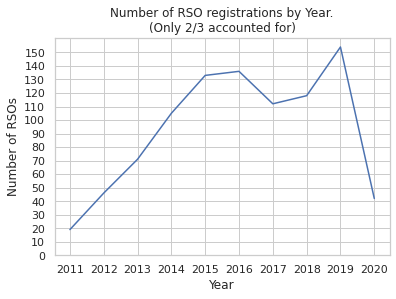

In [22]:
year_df = cleanup_start_date(copy2).start_date.dropna().value_counts().sort_index()
plt.plot(year_df.index, year_df);
plt.yticks(range(0, max(year_df) + 1, 10))
plt.title("Number of RSO registrations by Year.\n(Only 2/3 accounted for)");
plt.ylabel("Number of RSOs");
plt.xlabel("Year");

## 8. The Socials

In [23]:
social_colnames = [colname for colname in copy1.columns if colname.startswith('social_')]
social_colnames

['social_web',
 'social_insta',
 'social_fb',
 'social_twitter',
 'social_linkedin',
 'social_flickr',
 'social_gcal',
 'social_youtube',
 'social_callink']

Based on manual inspection, there is no need for cleanup.

## 9. Priv Phone

In [24]:
copy1.priv_phone

0         949-467-4006
1                  NaN
2                  NaN
3       (510) 642-5171
4         510-642-6161
             ...      
1372               NaN
1373               NaN
1374               NaN
1375      720-980-3114
1376               NaN
Name: priv_phone, Length: 1377, dtype: object

In [25]:
def clean_phone(val):
    val = re.sub('[^0-9]', '', val)
    val = re.sub(r'(\d{3})(\d{3})(\d{4})', r'(\1) \2-\3', val)
    return val
clean_phone('01sssa23wwda4ss56789|0"00')

'(012) 345-6789000'

In [26]:
copy2 = og_data.copy()
def cleanup_priv_phone(df):
    def return_valid(val):
        if (
            val is None 
            or val is np.nan 
            or len(val) == 0
        ):
            return np.nan
        else: 
            return clean_phone(val)

    df.priv_phone = df.priv_phone.apply(return_valid, convert_dtype=True)
    return df

cleanup_fn.add(cleanup_priv_phone)

#cleanup_priv_phone(copy2).priv_phone.dropna().value_counts()

# Closing

We have these functions that will clean up the corresponding columns. Add one last final function to finish it off. 

Final export: cleanup_pipeline(df)!!!

In [27]:
cleanup_fn

{<function __main__.cleanup_description(df)>,
 <function __main__.cleanup_priv_phone(df)>,
 <function __main__.cleanup_rso_email(df)>,
 <function __main__.cleanup_start_date(df)>,
 <function __main__.cleanup_summary(df)>}

In [28]:
# copy2 = og_data.copy()
# for fn in cleanup_fn:
#     copy2 = fn(copy2)
# copy2

In [29]:
def cleanup_pipeline(df):
    df = df.copy()
    for fn in cleanup_fn:
        df = fn(df)
    return df

In [30]:
# Save to csv
cleanup_pipeline(og_data.copy()).to_csv(r'/home/ivalexander13/msproul-local/data-cleaning/processed_all_rso.csv', index=False)

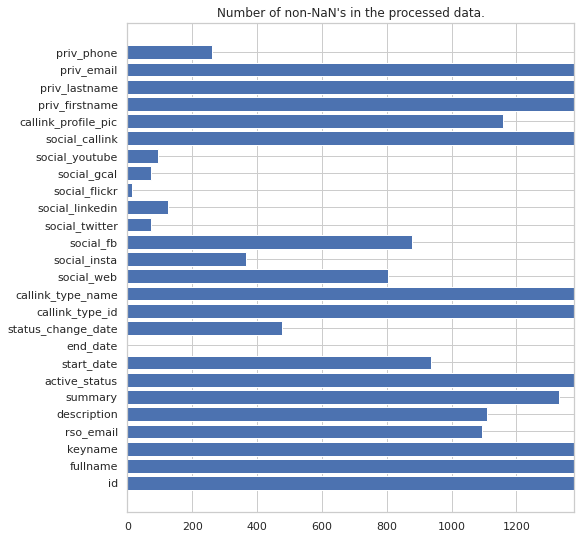

In [35]:
# See the missing data graph again, post-processing.
copy2 = cleanup_pipeline(og_data.copy())
cols = copy2.columns.values
counts_blank = [copy2[col].notnull().sum() for col in cols]

plt.figure(figsize=(8,9));
plt.barh(width=counts_blank, y=cols);
plt.xlim(0, len(copy2));
plt.yticks(cols)
plt.title("Number of non-NaN's in the processed data.");